In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
np.set_printoptions(threshold=11,precision=2,suppress=True)

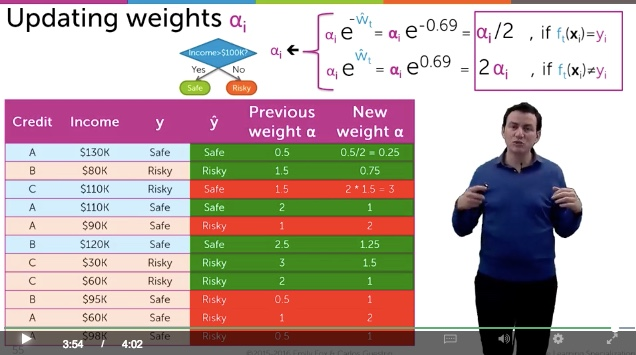

In [2]:
Image(filename='Updating Weights.jpg')

### Creates the same data as in the slide above

In [3]:
data = np.array([[1,-1,-1,1,1,1,-1,-1,1,1,1],
                 [130,80,110,110,90,120,30,60,95,60,98]])
data = np.swapaxes(data,0,1)
df = pd.DataFrame(data=data,
                  columns=['target','income'])
alpha1_list = [0.5,1.5,1.5,2,1,2.5,3,2,0.5,1,0.5]
df['alpha1'] = alpha1_list
df['class1'] = np.where(df['income'] > 100, 1, -1)
df['class1_comp'] = np.where(df['class1'] == df['target'], 0, 1)
df['class1_comp_weighted'] = df['class1_comp'] * df['alpha1']
df

,target,income,alpha1,class1,class1_comp,class1_comp_weighted
0,1,130,0.5,1,0,0.0
1,-1,80,1.5,-1,0,0.0
2,-1,110,1.5,1,1,1.5
3,1,110,2.0,1,0,0.0
4,1,90,1.0,-1,1,1.0
5,1,120,2.5,1,0,0.0
6,-1,30,3.0,-1,0,0.0
7,-1,60,2.0,-1,0,0.0
8,1,95,0.5,-1,1,0.5
9,1,60,1.0,-1,1,1.0


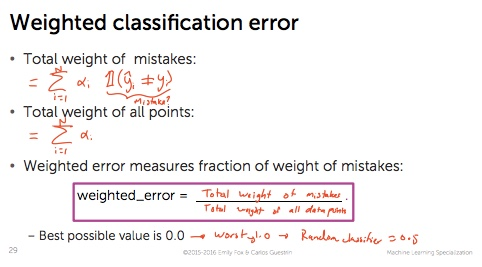

In [4]:
Image(filename='Weighted classification error.jpg')

In [5]:
class1_weight_error = df['class1_comp_weighted'].sum() / df['alpha1'].sum()
class1_weight_error

0.28125

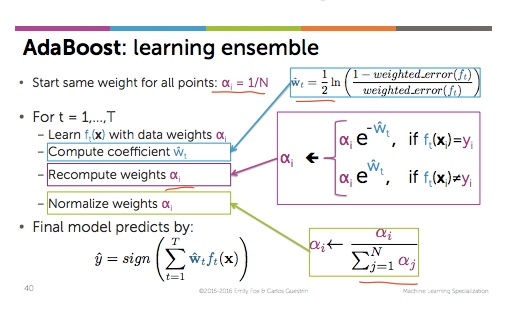

In [6]:
Image(filename='AdaBoost Learning Ensemble.jpg')

In [7]:
w_hat_t = 0.5 * np.log((1. - class1_weight_error)/class1_weight_error)
w_hat_t

0.46913481929646511

# This does not match what is shown in the next slide, where w_hat_t is 0.69?

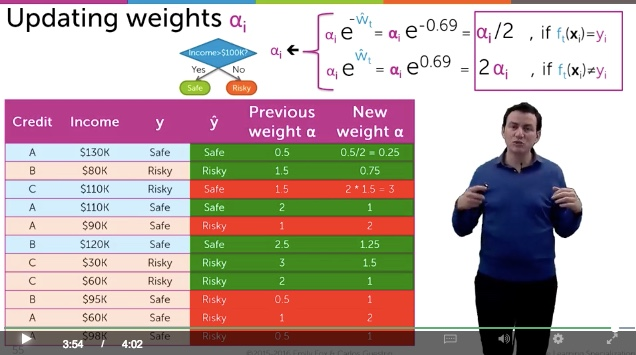

In [8]:
Image(filename='Updating Weights.jpg')

In [9]:
df['alpha2'] = np.where(df['class1_comp'] == 0, 
                        df['alpha1'] * (np.e ** (-1*w_hat_t)),
                        df['alpha1'] * (np.e ** w_hat_t))
df

,target,income,alpha1,class1,class1_comp,class1_comp_weighted,alpha2
0,1,130,0.5,1,0,0.0,0.312772
1,-1,80,1.5,-1,0,0.0,0.938315
2,-1,110,1.5,1,1,1.5,2.397916
3,1,110,2.0,1,0,0.0,1.251086
4,1,90,1.0,-1,1,1.0,1.598611
5,1,120,2.5,1,0,0.0,1.563858
6,-1,30,3.0,-1,0,0.0,1.876630
7,-1,60,2.0,-1,0,0.0,1.251086
8,1,95,0.5,-1,1,0.5,0.799305
9,1,60,1.0,-1,1,1.0,1.598611


In [10]:
df['alpha2'] = df['alpha2'] / df['alpha2'].sum()
df

,target,income,alpha1,class1,class1_comp,class1_comp_weighted,alpha2
0,1,130,0.5,1,0,0.0,0.021739
1,-1,80,1.5,-1,0,0.0,0.065217
2,-1,110,1.5,1,1,1.5,0.166667
3,1,110,2.0,1,0,0.0,0.086957
4,1,90,1.0,-1,1,1.0,0.111111
5,1,120,2.5,1,0,0.0,0.108696
6,-1,30,3.0,-1,0,0.0,0.130435
7,-1,60,2.0,-1,0,0.0,0.086957
8,1,95,0.5,-1,1,0.5,0.055556
9,1,60,1.0,-1,1,1.0,0.111111
